In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from PIL import Image
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Завантажуємо дані - це датасет з першої лаби 
df = pd.read_csv('weather_classification_data.csv')

In [11]:
# Виведення назв колонок і розміру датасету
print("Назви колонок:", df.columns)
print("Розмір датасета:", df.shape)

Назви колонок: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')
Розмір датасета: (13200, 11)


In [12]:
# Перетворення категоріальних змінних за допомогою LabelEncoder
label_encoders = {}
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Зберігаємо LabelEncoder для кожної колонки
    
    # Виводимо розшифровку значень
    print(f"Розшифровка для '{col}':")
    for idx, class_ in enumerate(le.classes_):
        print(f"  {idx}: {class_}")

Розшифровка для 'Cloud Cover':
  0: clear
  1: cloudy
  2: overcast
  3: partly cloudy
Розшифровка для 'Season':
  0: Autumn
  1: Spring
  2: Summer
  3: Winter
Розшифровка для 'Location':
  0: coastal
  1: inland
  2: mountain
Розшифровка для 'Weather Type':
  0: Cloudy
  1: Rainy
  2: Snowy
  3: Sunny


In [13]:
# Нормалізація числових значень
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
# Виділимо дані без цільової змінної для PCA і t-SNE
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

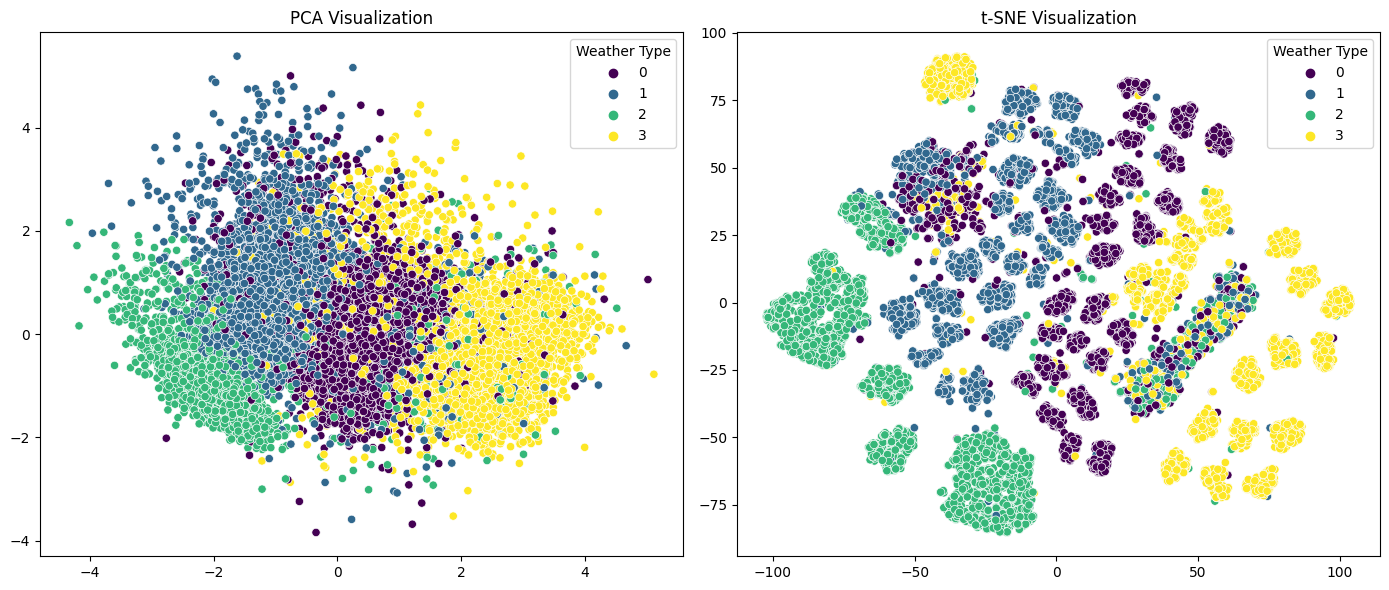

In [15]:
# Візуалізація PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA Visualization')

# Візуалізація t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', legend='full')
plt.title('t-SNE Visualization')

plt.tight_layout()
plt.show()

Далі я навожу два різних кода для квантування зображення Перший менш оптимізований ніж другий, тому виконується набагато довше. Другий код був зроблений з використанням наданого до завдання сайту якості прикладу.

In [18]:
# Функція для квантування зображення
def quantize_image(image, k):
    # Перетворення зображення в двовимірний масив пікселів (RGB)
    pixels = np.array(image).reshape(-1, 3)
    
    # Використання k-means для квантування
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # Замінюємо кольори пікселів центроїдами кластерів
    new_pixels = kmeans.cluster_centers_[kmeans.labels_]
    new_image = new_pixels.reshape(image.size[1], image.size[0], 3).astype(np.uint8)
    
    return Image.fromarray(new_image)

In [19]:
# Завантаження зображення через Pillow
image_path = 'myimage.jpg'
image = Image.open(image_path)

C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

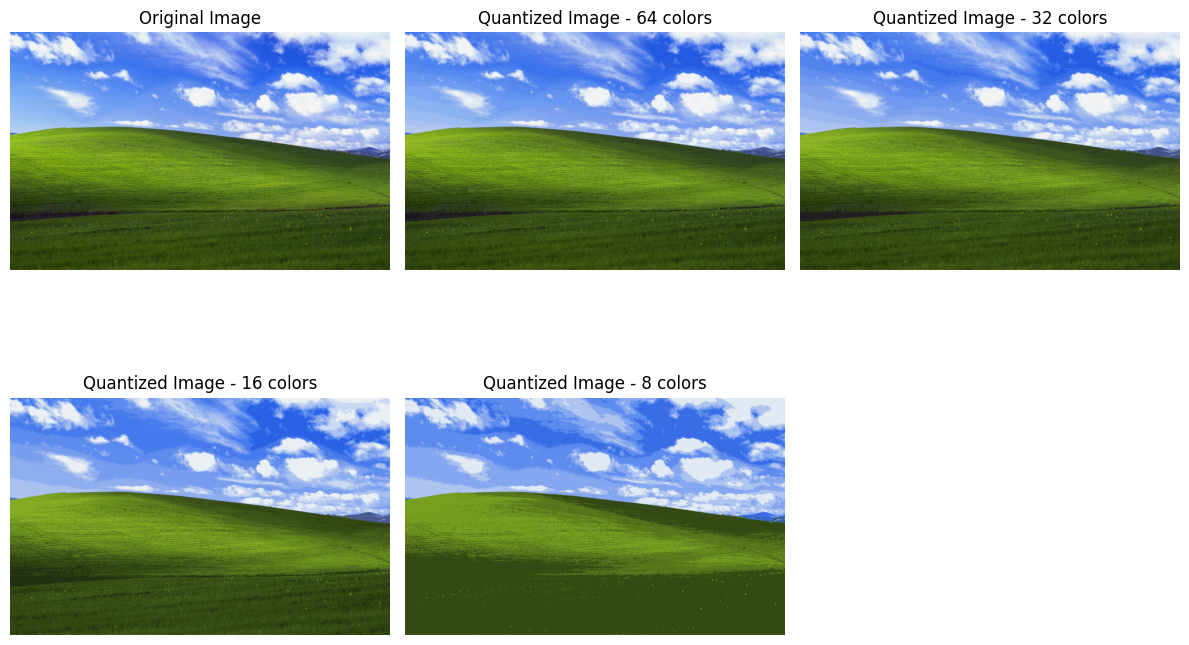

In [20]:
# Візуалізація оригінального зображення та квантування для різних рівнів
levels = [64, 32, 16, 8]

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, k in enumerate(levels):
    quantized_image = quantize_image(image, k)
    plt.subplot(2, 3, i+2)
    plt.imshow(quantized_image)
    plt.title(f'Quantized Image - {k} colors')
    plt.axis('off')

plt.tight_layout()
plt.show()

Другий код:


Fitting model with 64 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.210s.
Predicting color indices for 64 colors
done in 0.092s.

Fitting model with 32 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.155s.
Predicting color indices for 32 colors
done in 0.057s.

Fitting model with 16 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.150s.
Predicting color indices for 16 colors
done in 0.042s.

Fitting model with 8 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.124s.
Predicting color indices for 8 colors
done in 0.034s.


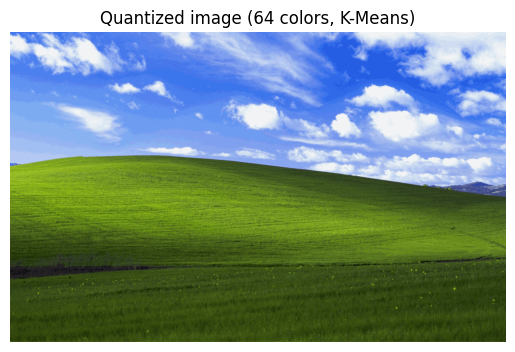

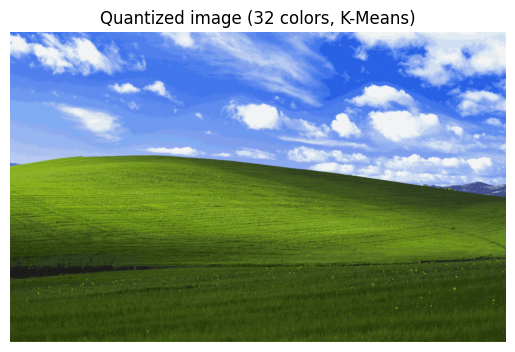

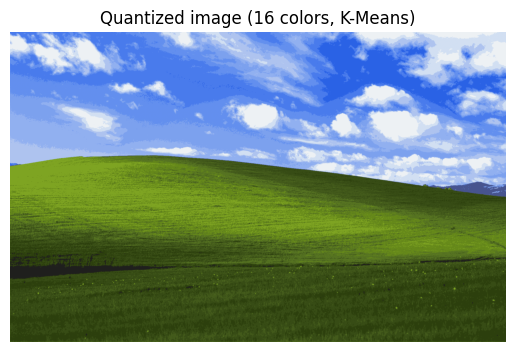

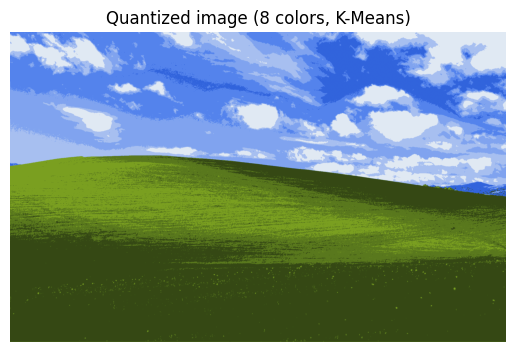

In [22]:
# Функція для відтворення зображення з кодової книги та міток
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

# Завантаження та підготовка зображення
image_path = 'myimage.jpg' 
image = Image.open(image_path)
image = np.array(image, dtype=np.float64) / 255  # Масштабування пікселів до [0, 1]

# Вимірювання розмірів зображення
w, h, d = original_shape = tuple(image.shape)
assert d == 3 
image_array = np.reshape(image, (w * h, d))

# Квантування для кожної глибини кольору
levels = [64, 32, 16, 8]

for n_colors in levels:
    print(f"\nFitting model with {n_colors} colors")
    t0 = time()
    # Вибір випадкової підвибірки пікселів для навчання
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")

    # Отримання міток для всіх пікселів
    print(f"Predicting color indices for {n_colors} colors")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")

    # Створення та відображення квантованого зображення
    plt.figure()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.show()


In [26]:
# Завантаження даних
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

data.head

<bound method NDFrame.head of      label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [27]:
# Передобробка тексту
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

def preprocess_text(text):
    # Видалення пунктуації і приведення до нижнього регістру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Видалення стоп-слів
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

data['text_clean'] = data['text'].apply(preprocess_text)
data['text_clean']

{'while', 'mustn', 'between', 'with', 'on', 'were', 'not', "hasn't", 'isn', 'ain', 'but', 'yours', 'if', 'you', 'hasn', 'through', 'our', 'whom', 'more', "won't", "didn't", "haven't", 'does', 'until', "weren't", 'out', 'shan', "shouldn't", 'hers', 'd', 'than', 'her', 'or', 'yourselves', 'for', 'off', 'haven', 'have', 'his', 'here', "you'd", 'from', 'how', 'very', 'should', 'each', 'am', "you've", 'ours', 'up', 'same', 'hadn', 'which', 'weren', 'these', 'himself', "mightn't", "should've", 'needn', 'a', 'me', 'about', 'under', "she's", "it's", 'its', 'above', 'further', 'she', 'myself', "that'll", 'below', 'down', 'other', 'mightn', 'only', 'against', 'as', 'such', 'all', 'are', 'doing', 'ma', "isn't", 'm', "mustn't", "wouldn't", 'what', 'an', "you'll", 'having', 'before', 'll', 'by', 'they', 's', 'them', 'can', 'most', "hadn't", 'and', 've', 'be', 'we', 'has', 'those', 'don', "aren't", 'shouldn', "you're", 'yourself', 'few', 'into', 'won', 'this', 'both', 't', 'again', "wasn't", "shan't

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alkov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å750 pound prize ...
5568                         ì_ b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: text_clean, Length: 5572, dtype: object

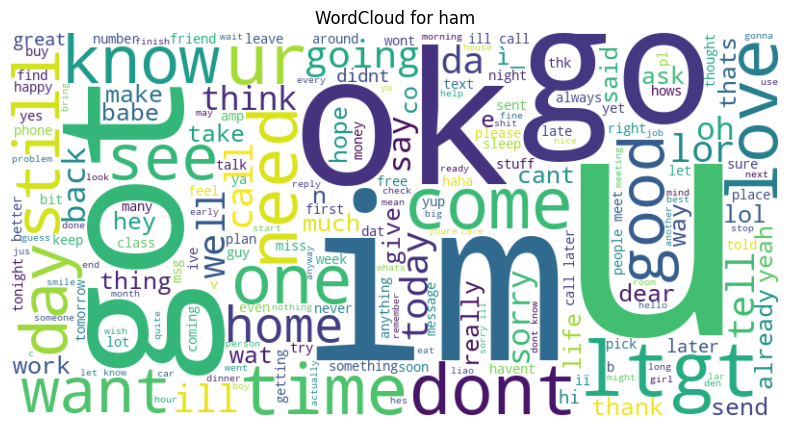

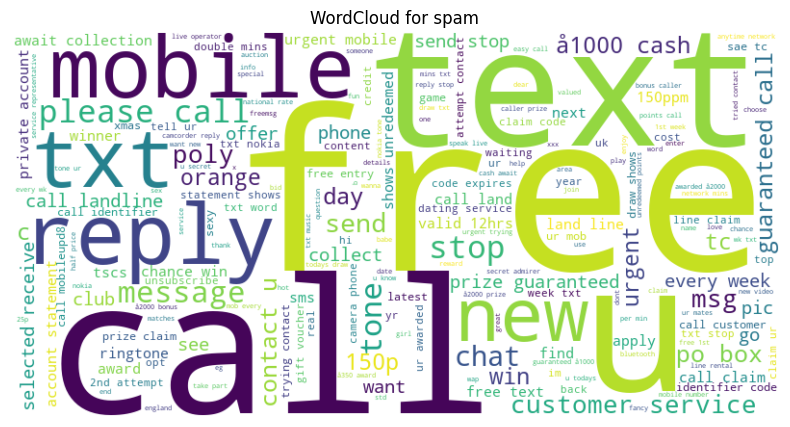

In [28]:
# Візуалізація WordCloud для кожного класу
for label in data['label'].unique():
    subset = data[data['label'] == label]
    text = ' '.join(subset['text_clean'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label}')
    plt.show()

In [30]:
# Преобробка даних
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Векторизація тексту
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['text_clean'])
y = data['label']

# Розбиття даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Навчання класифікатора
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Прогнозування
y_pred = classifier.predict(X_test)

# Оцінка якості
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.979066985645933
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.85      0.91       219

    accuracy                           0.98      1672
   macro avg       0.98      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672

